# **Problem Definition**

Our main aim is to Predict which individuals are most likely to have a bank accounts. This will help give a general idea of the state of financial inclusion for the four countries, Kenya , Uganda , Tanzania and Rwanda. It will also provode insights to the key demograph factors that might drive an individual's financial outcome.




# **Metric for Success**

Our analysis will be a success if we shall be able to provide insights to the state of financial inclusion and the key demographs that influence this.

# **Research context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

#**Experimental Design**
Below are the steps that will be conducted in this analysis in order to answer the research question as accurately and comprehensively as possible:

1. Load data and preview preliminary characteristics of the dataset
2. Data Cleaning (check for and deal with outliers, messy column names, values and missing data)
3. Univariate Analysis
4. Bivariate Analysis
5. Multivariate Analysis
6. Implementing the Solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.
7. Challenging the Solution by providing insights on how you can make improvements.

# **Data Validation**
The main dataset contains demographic information and ownership of a bank account by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data available for this analysis is valid and useful towards answering the reseach question as it will allow us to identify some of the key demographic factors that influence whether an individual likely to have a bank account.

**Understanding our data**:

We have a dataset that contains the following columns:
country	Country interviewee is in.


1.   country:Country interviewee is in
2.   year:Year survey was done in.
3.   uniqueid:Unique identifier for each interviewee
4.   has_a_bank_account : Yes , No
5.   location_type:Type of location: Rural, Urban
6.   cellphone_access:	If interviewee has access to a cellphone: Yes, No
7.  household_size:Number of people living in one house
8.  age_of_respondent:	The age of the interviewee
9.  gender_of_respondent:	Gender of interviewee: Male, Female
10.  relationship_with_head:	The interviewee's relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
11. marital_status:	The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Dont know
12. education_level:	Highest level of education: No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
13. job_type	Type of job interviewee has: Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed, Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer


We will start on performing EDA on our dataset.









In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load our dataset
#This is our dataset : https://bit.ly/FinancialDataset
finance_df = pd.read_csv('/content/Financial Dataset - 1.csv')
#Check our first five records
finance_df.head()



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Check out last five records
finance_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Check shape of our dataset
finance_df.shape

#Our dataset has 13 columns and 23524 records

(23524, 13)

In [ ]:
#Check datatypes of our columns
finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
#Description of our data
finance_df.describe()


,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


**Data Cleaning**:

We start cleaning our data by checking for any missing data,outliers,messy column values,duplicates etc


In [ ]:
#Fix messy column names
finance_df.columns = finance_df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
#Check for unique values
finance_df.nunique()

country                      4
year                         6
uniqueid                  8735
has_a_bank_account           2
type_of_location             2
cell_phone_access            2
household_size              21
respondent_age              85
gender_of_respondent         2
the_relathip_with_head       6
marital_status               5
level_of_educuation          7
type_of_job                 10
dtype: int64

In [ ]:
#Check unique values for year
finance_df['year'].unique()
finance_df.year.value_counts()


2016    8734
2018    8167
2017    6620
2029       1
2056       1
2039       1
Name: year, dtype: int64

In [ ]:
#Check row for 2029,2056,2039
finance_df[finance_df['year']== 2029]
#Since data collection for Kenya took place in 2018 , we replace 2029 with 2018
finance_df.loc[finance_df['year']==2029,'year']= 2018

In [ ]:
finance_df[finance_df['year'] == 2056 ]
#Since data collection for Kenya took place in 2018 , we replace 2029 with 2018
finance_df.loc[finance_df['year']==2056,'year']= 2018

In [ ]:
finance_df[finance_df['year']== 2039]
#Since data collection for Rwanda took place in 2016 , we replace 2039 with 2016
finance_df.loc[finance_df['year']==2039,'year']= 2016

#Check our unique values
finance_df['year'].unique()

array([2018, 2016, 2017])

In [ ]:
finance_df.level_of_educuation.value_counts()
finance_df[finance_df['level_of_educuation']== '6']
#We know that level of education can be No formal education,
#Primary education, Secondary education, Vocational/Specialised training, 
#Tertiary education, Other/Dont know/RTA

#So we replace 6 with Other/Dont know/RTA
finance_df.loc[finance_df['level_of_educuation']== '6','level_of_educuation'] = 'Other/Dont know/RTA'
finance_df.level_of_educuation.value_counts()

Primary education                  12775
No formal education                 4506
Secondary education                 4220
Tertiary education                  1156
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: level_of_educuation, dtype: int64

In [ ]:
#Check for missing values
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#Dealing with missing values

#For country let's check which rows have the missing data
finance_df[finance_df['country'].isna()]

#We see that countries whose data was collected in 2017 had missinf values, We know that records for Tanzania was collected in 2017
#We replace Nan with Tanzania
finance_df["country"].fillna("Tanzania", inplace = True)

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#For the numerical variables we can fill the missing values with the mean
finance_df["household_size"].fillna(finance_df['household_size'].mean(), inplace = True)
finance_df["respondent_age"].fillna(finance_df['respondent_age'].mean(), inplace = True)

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size             0
respondent_age             0
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
#The remaining missing values are categorical values 
#For the columns the_relathip_with_head,marital_status,level_of_educuation,type_of_job
#We can replace Nan with Don't know     
          
finance_df['the_relathip_with_head'].fillna("Dont know", inplace = True) 
finance_df['marital_status'].fillna("Dont know", inplace = True) 
finance_df['level_of_educuation'].fillna("Other/Dont know/RTA", inplace = True) 
finance_df['type_of_job'].fillna("Dont Know/Refuse to answer", inplace = True)      

finance_df.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size             0
respondent_age             0
gender_of_respondent      34
the_relathip_with_head     0
marital_status             0
level_of_educuation        0
type_of_job                0
dtype: int64

In [ ]:
#The remaining dataset has binary type of data which is not easy to deduce from other values
#Hence, we can drop all remaining null values
finance_df.dropna(inplace= True)
finance_df.isnull().sum()

#We have no missing values now.

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

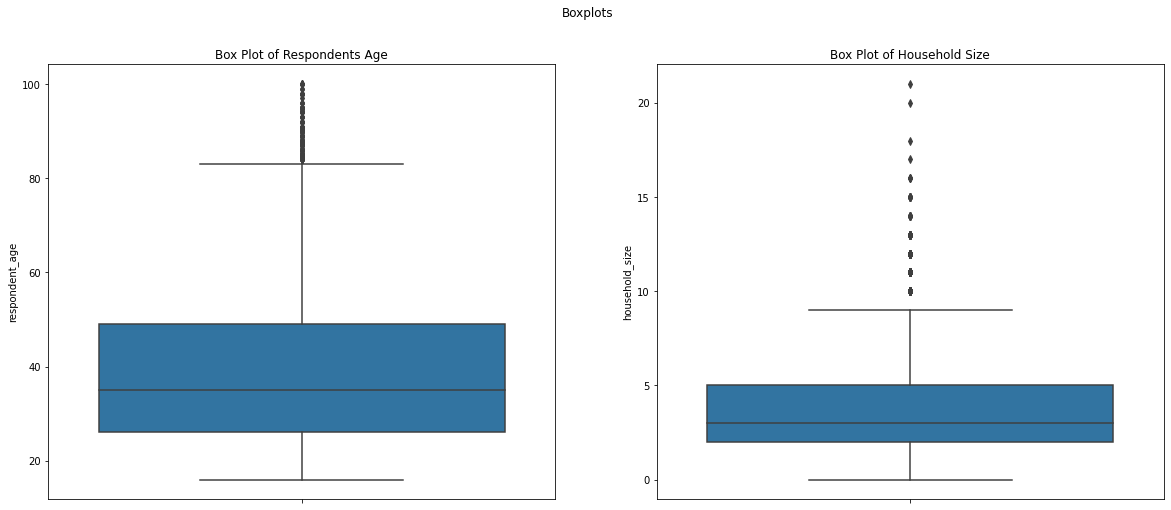

In [ ]:
#Check for outliers.
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=finance_df, y = "respondent_age", ax=ax[0])
ax[0].set_title('Box Plot of Respondents Age')
sns.boxplot(data=finance_df, y = "household_size", ax=ax[1])
ax[1].set_title('Box Plot of Household Size')

plt.show()


#We keep the outliers since it is possible to have people with ages greater than 80.
#Also it is common for some families to leave together with extended 
#family hence household size greater then 10 is possible


**UNIVARIATE ANALYSIS**

Visualizing Categorical variables:


In [ ]:
fig = plt.figure(figsize=(18,10), dpi=1600)
#1 rows 2 columns

#first row, first column
ax1 = plt.subplot2grid((1,2),(0,0))
plt.pie(finance_df['gender_of_respondent'].value_counts(),
        labels = ['Male','Female'],startangle = 90 , autopct = '%.2f')
plt.title("Pie Chart of respondent's age")

#first row sec column
ax1 = plt.subplot2grid((1,2), (0, 1))
plt.pie(finance_df['type_of_location'].value_counts(),
        labels = ['Rural','Urban'],startangle = 180 , autopct = '%.2f')
plt.title('Pie chart showing Location Type')

plt.show()

#We can see that there are more males than females and more respondents lived in Rural areas.

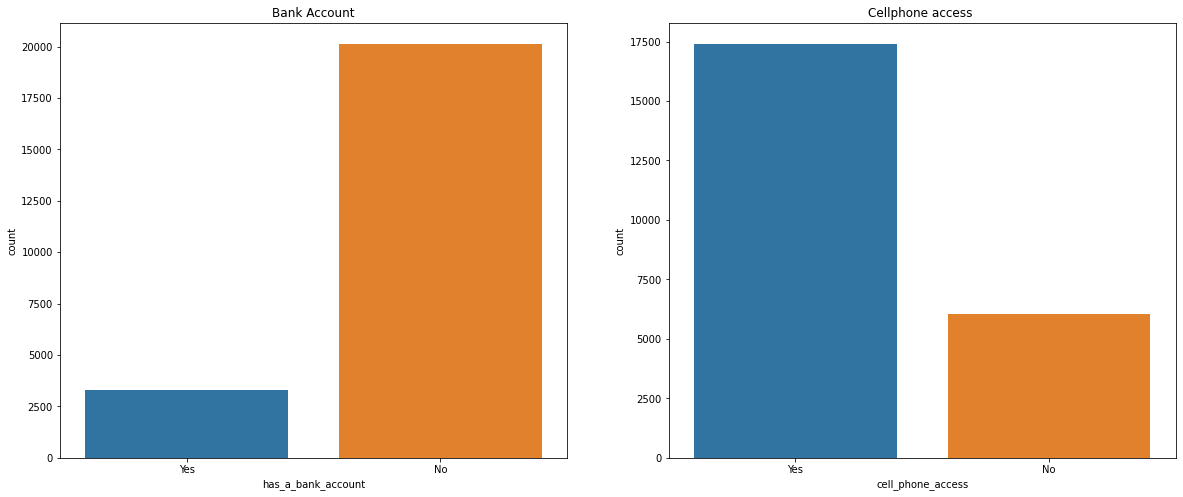

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.countplot(data=finance_df, x = "has_a_bank_account", ax=ax[0])
ax[0].set_title('Bank Account')
sns.countplot(data=finance_df, x = "cell_phone_access", ax=ax[1])
ax[1].set_title('Cellphone access ')

plt.show()

#We can say that most of the respondents have no bank accounts but have access to cellphone access.

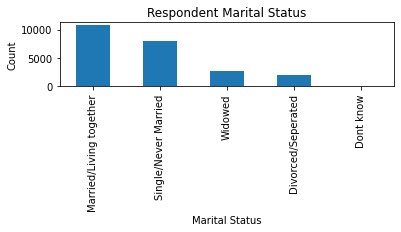

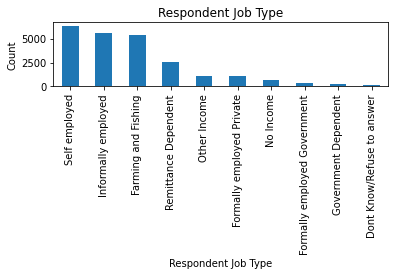

In [ ]:

fig = plt.figure(figsize=(18,10), dpi=1600)
#first row first column
ax1 = plt.subplot2grid((3,1),(0,0))
finance_df['the_relathip_with_head'].value_counts().plot.bar()
plt.xlabel("relation to household head")
plt.ylabel("Count")
plt.title("Respondent Relation to Household Head")
plt.show()

#Second row first column
ax1 = plt.subplot2grid((3,1),(1,0))
finance_df['marital_status'].value_counts().plot.bar()
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Respondent Marital Status")
plt.show()

#Third row first column
ax1 = plt.subplot2grid((3,1),(2,0))
finance_df['type_of_job'].value_counts().plot.bar()
plt.xlabel("Respondent Job Type")
plt.ylabel("Count")
plt.title("Respondent Job Type")
plt.show()

#We can say That most of the respondents were head of the households, were married and self-employed.

Numerical Variables

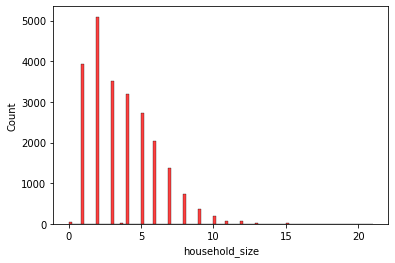

In [ ]:
#Plot a histogram
sns.histplot(finance_df['household_size'],color = 'Red')

#We can say that the distribution is skewed to the right

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


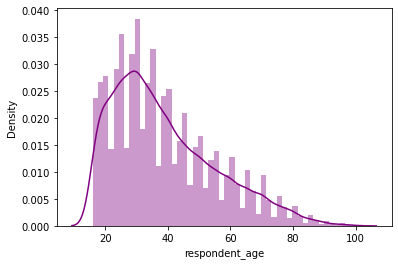

In [ ]:
#Plot a distplot
#Distplot is a histogram with a line on it.
sns.distplot(finance_df['respondent_age'],color = 'Purple')

#We can say distribution is skewed to the right

*Measure of Central Tendency*

In [ ]:
#Check for age
#Mean
age_mean = finance_df['respondent_age'].mean()
print('The mean of the age of Respondents is : ',age_mean)
print('\n.........................................................................................\n')
#Median
age_median = finance_df['respondent_age'].median()
print('The median of the age of Respondents is : ',age_median)
print('\n.........................................................................................\n')

#Mode
age_mode = finance_df['respondent_age'].mode()
print('The mode of the age of Respondents is : ',age_mode)

#The mode is bimodal (0 and 30)

The mean of the age of Respondents is :  38.80741667988001

.........................................................................................

The median of the age of Respondents is :  35.0

.........................................................................................

The mode of the age of Respondents is :  0    30.0
dtype: float64


In [ ]:
#Check for Household Size
#Mean
Hsize_mean = finance_df['household_size'].mean()
print('The mean of the Household size is : ',Hsize_mean)
print('\n.........................................................................................\n')
#Median
Hsize_median = finance_df['household_size'].median()
print('The median of the Household size is : ',Hsize_median)
print('\n.........................................................................................\n')

#Mode
Hsize_mode = finance_df['household_size'].mode()
print('The mode of the Household size is : ',Hsize_mode)
#The mode is bimodal (0 and 2)

The mean of the Household size is :  3.686926414311584

.........................................................................................

The median of the Household size is :  3.0

.........................................................................................

The mode of the Household size is :  0    2.0
dtype: float64


*Measure of Dispersion*

In [ ]:
#Age
#Standard deviation
age_std = finance_df['respondent_age'].std()
print("The Respondent's age standard deviation is ",age_std)
print('\n.........................................................................................\n')

#Variance
age_var = finance_df['respondent_age'].var()
print("The Respondent's age variance is ",age_var)
print('\n.........................................................................................\n')

#Range
age_max = finance_df['respondent_age'].max()
age_min = finance_df['respondent_age'].min()
age_range = age_max - age_min
print('The range of the Respondent age is : ',age_range)
print('\n.........................................................................................\n')

#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
age_iqr = iqr(finance_df['respondent_age'])
print('The Interquartile Range for Respondent age variable is : ',age_iqr)
print('\n.........................................................................................\n')

#Skewness
#Measeure of symmetry
age_skew = finance_df['respondent_age'].skew()
print('The skewness of age variable is : ',age_skew)
print('\n.........................................................................................\n')
#Skewness is positive meaning that data is skewed right.

#Kurtosis
age_kurt = finance_df['respondent_age'].kurt()
print('The kurtosis of age variable is : ',age_kurt)
print('\n.........................................................................................\n')
#Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

#Putting it all together
finance_df['respondent_age'].describe()

The Respondent's age standard deviation is  16.516711802713257

.........................................................................................

The Respondent's age variance is  272.8017687738874

.........................................................................................

The range of the Respondent age is :  84.0

.........................................................................................

The Interquartile Range for Respondent age variable is :  23.0

.........................................................................................

The skewness of age variable is :  0.8418778832863799

.........................................................................................

The kurtosis of age variable is :  0.10346047874300401

.........................................................................................



count    23447.000000
mean        38.807417
std         16.516712
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

In [ ]:
#HouseHold Size
#Standard deviation
Hsize_std = finance_df['household_size'].std()
print("The Respondent's Household size standard deviation is ",Hsize_std)
print('\n.........................................................................................\n')

#Variance
Hsize_var = finance_df['household_size'].var()
print("The Respondent's Household size variance is ",Hsize_var)
print('\n.........................................................................................\n')

#Range
Hsize_max = finance_df['household_size'].max()
Hsize_min = finance_df['household_size'].min()
Hsize_range = Hsize_max - Hsize_min
print('The range of the Respondent Household size is : ',Hsize_range)
print('\n.........................................................................................\n')

#Interquartile Range
#the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile).
from scipy.stats import iqr
Hsize_iqr = iqr(finance_df['household_size'])
print('The Interquartile Range for Respondent Household size variable is : ',Hsize_iqr)
print('\n.........................................................................................\n')

#Skewness
#Measeure of symmetry
Hsize_skew = finance_df['household_size'].skew()
print('The skewness of Household size variable is : ',Hsize_skew)
print('\n.........................................................................................\n')
#Skewness is positive meaning that data is skewed right.

#Kurtosis
Hsize_kurt = finance_df['household_size'].kurt()
print('The kurtosis of Household size variable is : ',Hsize_kurt)
print('\n.........................................................................................\n')
#Since Kurtosis is greater than zero , we can say data is heavy tailed hence there's presence of outliers

#Putting it all together
finance_df['household_size'].describe()

The Respondent's Household size standard deviation is  2.2792477183077735

.........................................................................................

The Respondent's Household size variance is  5.194970161411191

.........................................................................................

The range of the Respondent Household size is :  21.0

.........................................................................................

The Interquartile Range for Respondent Household size variable is :  3.0

.........................................................................................

The skewness of Household size variable is :  0.9752673119630328

.........................................................................................

The kurtosis of Household size variable is :  1.1580661329361344

.........................................................................................



count    23447.000000
mean         3.686926
std          2.279248
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

**DEDUCTIONS FROM UNIVARIATE ANALYSIS**

*Categorical variables*:

. From the dataset, we can say that most of the 
interviewees were more males than females.

. Also, most reside in the rural areas compared to urban areas.

. Most of the respondents were head of the household and were married or living together with their spouses.

. Most of them had access to cellphones and were self employed.
. Most of the respondents did not have cellphone access.

*Numerical variables*:

Age distribution was skewed to the right.
The mean age was 38 , median was 35 , mode was 30.This shows that most of our respondents were in their thirties.

The Household size distribution was skewed to the right.
Mean was 3 , median was 3 and mode was 2.

**Bivariate Analysis**

Univariate analysis may end up giving misleading information, therefore, we perform Bivariate and Multivariate which is capable of analysing data better.

In [ ]:
#Drop unnecessary column
finance_df.drop(['year','uniqueid'],axis = 1 ,inplace = True)
finance_df.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Relationship between Country and Bank Account status
pd.crosstab(index = finance_df['country'], columns = finance_df['has_a_bank_account'])

#We can derive that in all the 4 countries majority of the respondents do not have bank accounts.

has_a_bank_account,No,Yes
country,,
Kenya,4544,1520
Rwanda,7732,1003
Tanzania,5946,601
Uganda,1920,181


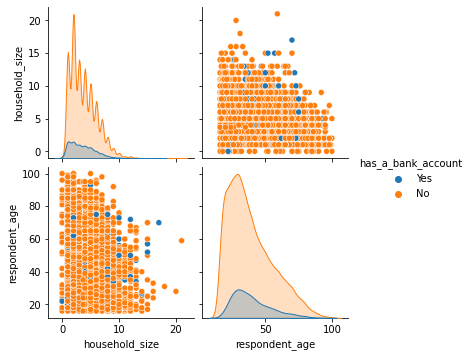

In [ ]:
#Pairwise relationshop in dataset
sns.pairplot(finance_df, hue = 'has_a_bank_account')
plt.show()

#The plot shows there's little correlation between the Household_size and respondent_age variables.

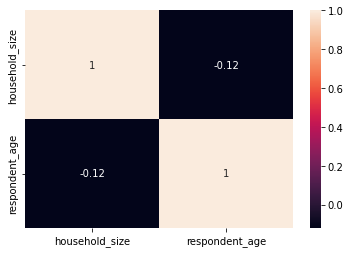

In [ ]:
# Plotting the Pearson correlation coefficient among numeric variables


sns.heatmap(finance_df.corr(),annot=True)
plt.show()

#We can say that the numerical variables age and household size have a very small correlation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

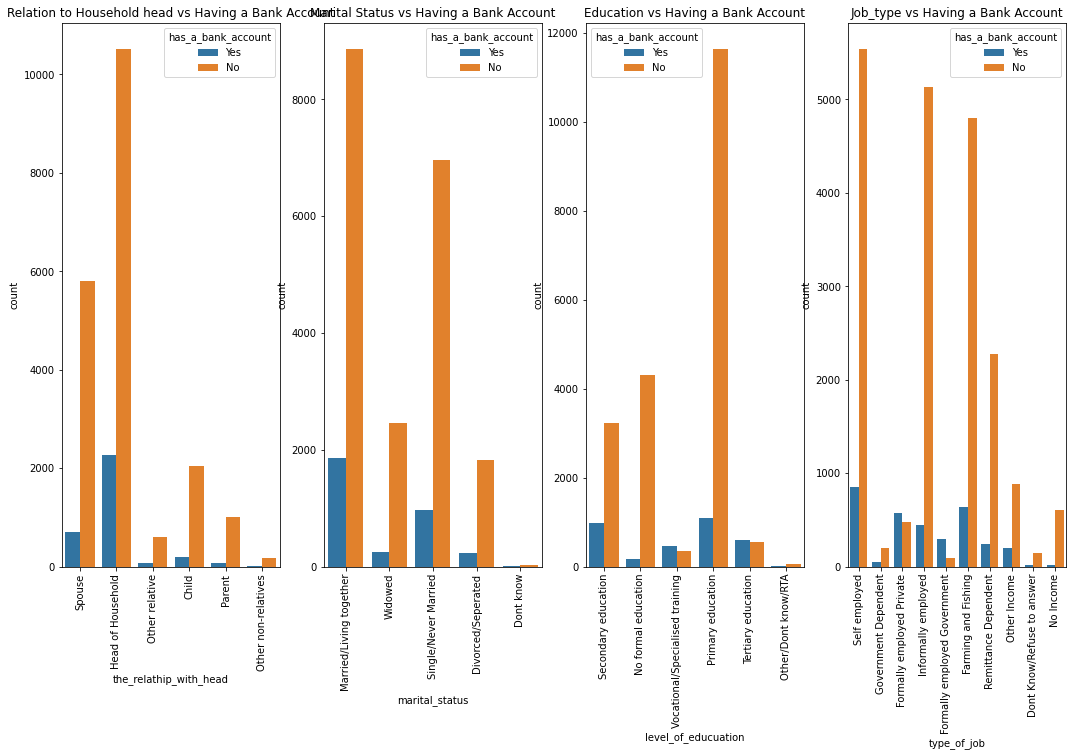

In [ ]:
# Comparing the categorical variables vs having a bank account


fig,ax=plt.subplots(1,4,figsize=(18,10))

sns.countplot('the_relathip_with_head',hue='has_a_bank_account',data=finance_df,ax=ax[0])
ax[0].set_title('Relation to Household head vs Having a Bank Account')

sns.countplot('marital_status',hue='has_a_bank_account',data=finance_df,ax=ax[1])
ax[1].set_title('Marital Status vs Having a Bank Account')


sns.countplot('level_of_educuation',hue='has_a_bank_account',data=finance_df,ax=ax[2])
ax[2].set_title('Education vs Having a Bank Account')


sns.countplot('type_of_job',hue='has_a_bank_account',data=finance_df,ax=ax[3])
ax[3].set_title('Job_type vs Having a Bank Account')



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

In [ ]:
pd.crosstab(index = finance_df['cell_phone_access'], columns = finance_df['has_a_bank_account'])

#We can see that most people with cell_phone access have no bank Account.

has_a_bank_account,No,Yes
cell_phone_access,,
No,5935,104
Yes,14207,3201


In [ ]:
pd.crosstab(index = finance_df['gender_of_respondent'], columns = finance_df['has_a_bank_account'])

#We can see that more females than male have no bank accounts.

has_a_bank_account,No,Yes
gender_of_respondent,,
Female,12351,1482
Male,7791,1823


**Bivariate analysis findings**

*Analysis by demographic factors*:

Numerical:

---



Younger people had bank accounts compared to the elder people
Household with less people had bank accounts.

There was a very small correlation between the household size and one owning a bank account.
There was a very small correlation between the household size and one owning a bank account.

Categorical:

Repondents who were head of their households, Most of them had no bank accounts. Among those with bank accounts, they were also the most. This may be because they were the majority in that demograph.

Respondents who were married were the majority among those with bank accounts and also those without.

It was noted that a majority of respondents only with Primary level of education had no bank accounts. However respondents with any form of education, e.g secondary, vocational , tertiary, most of them had bank accounts.

Most respondents had access to cellphones and yet did not have bank accounts.

Most respondents who were female did not have bank accounts.


**Problems and Recommendations**

Our data is highly imbalanced. It leans more towards certain demographics than others.

Also our data is collected from different years for different countries hence may result to some minor inaccuracies.


**Multivariate Analysis**


In [ ]:
#Converting Categorical variables into numerical using replace()

num_var = {'type_of_location':{'Rural' : 1, 'Urban' : 0 },
'has_a_bank_account':{'Yes':1,'No':0},
'cell_phone_access':{'Yes':1, 'No':0},
'gender_of_respondent':{'Male':1,'Female': 0 },
'the_relathip_with_head':{'Head of Household':0,'Spouse':1,'Child':2,'Parent':3,'Other relative':4,'Other non-relatives':5,'Dont know':6},
'marital_status':{'Married/Living together':0,'Divorced/Seperated':1, 'Widowed':2, 'Single/Never Married':3, 'Dont know':4},
'level_of_educuation':{'No formal education':0,'Primary education':1, 'Secondary education':2, 'Vocational/Specialised training':3, 'Tertiary education':4, 'Other/Dont know/RTA':5},
'type_of_job':{'Farming and Fishing':0,'Self employed':1,'Formally employed Government':2, 'Formally employed Private':3, 'Informally employed':4, 'Remittance Dependent':5,'Government Dependent':6, 'Other Income':7, 'No Income':8, 'Dont Know/Refuse to answer':9}} 

finance_df.replace(num_var, inplace = True)

In [ ]:
#Check our data
finance_df.head()

,country,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,1,1,1,3.0,24.0,0,1,0,2,1
1,Kenya,0,1,0,5.0,70.0,0,0,2,0,6
2,Kenya,1,0,1,5.0,26.0,1,4,3,3,1
3,Kenya,0,1,1,5.0,34.0,0,0,0,1,3
4,Kenya,0,0,0,8.0,26.0,1,2,3,1,4


In [ ]:
#Check correlation
finance_df.corr()

,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relathip_with_head,marital_status,level_of_educuation,type_of_job
has_a_bank_account,1.000000,-0.088243,0.209435,-0.022222,0.019302,0.116585,-0.099656,-0.072876,0.356892,-0.026590
type_of_location,-0.088243,1.000000,0.083904,0.274123,0.047712,-0.013234,-0.027008,-0.263770,-0.131082,-0.089214
cell_phone_access,0.209435,0.083904,1.000000,0.098574,-0.103953,0.101961,-0.052917,-0.133146,0.233164,-0.111796
household_size,-0.022222,0.274123,0.098574,1.000000,-0.119808,0.010528,0.199083,-0.292683,-0.028919,-0.036565
respondent_age,0.019302,0.047712,-0.103953,-0.119808,1.000000,0.013017,-0.442748,-0.118823,-0.297799,-0.118812
gender_of_respondent,0.116585,-0.013234,0.101961,0.010528,0.013017,1.000000,-0.170581,-0.011460,0.105813,-0.070891
the_relathip_with_head,-0.099656,-0.027008,-0.052917,0.199083,-0.442748,-0.170581,1.000000,0.205441,0.152156,0.169242
marital_status,-0.072876,-0.263770,-0.133146,-0.292683,-0.118823,-0.011460,0.205441,1.000000,0.074055,0.095637
level_of_educuation,0.356892,-0.131082,0.233164,-0.028919,-0.297799,0.105813,0.152156,0.074055,1.000000,0.093340
type_of_job,-0.026590,-0.089214,-0.111796,-0.036565,-0.118812,-0.070891,0.169242,0.095637,0.093340,1.000000


*REDUCTION TECHNIQUES*

We perform dimension reduction to reduce number of variables considered during analysis. Helps pick out the significant variables necessary for analysis.
1. PRINCIPAL COMPONENT ANALYSIS

In [ ]:
#Divide our dataset into features and labels

#Convert has_data_column back to 'object' datatype
finance_df['has_a_bank_account'].replace(1,'Yes',inplace=True)
finance_df['has_a_bank_account'].replace(0,'No',inplace = True)

#Drop unnecessary column


#Divide into features and labels
X = finance_df.drop(['has_a_bank_account','country'],axis = 1)
y = finance_df['has_a_bank_account']

In [ ]:
#Divide data into training and test sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#Standardization
#Removes biases in original variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Perform PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Get component variance

pca.explained_variance_ratio_
#Returns variance caused by each of the principal components

#Get cumulative proportion
np.cumsum(pca.explained_variance_ratio_)

array([0.20285335, 0.38138413, 0.52867923, 0.63077144, 0.72930233,
       0.81096229, 0.88367514, 0.94893097, 1.        ])

In [ ]:
#Get component loadings
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

#positive and negative values in component loadings reflects the positive and negative 
#correlation of the variables with the PCs

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
variable,,,,,,,,,
type_of_location,-0.272049,0.430032,0.226278,0.014180,0.090807,-0.760463,0.318352,0.041372,0.007026
cell_phone_access,-0.001851,0.365965,-0.500644,-0.137020,-0.424262,-0.243480,-0.587423,-0.069692,0.086272
household_size,-0.044927,0.582831,0.239686,0.073844,0.238480,0.347389,-0.283275,0.420109,-0.401372
respondent_age,-0.519303,-0.291840,0.031215,0.126768,-0.118415,-0.011641,-0.165261,0.654599,0.397669
gender_of_respondent,-0.100721,0.041835,-0.523380,0.287282,0.759405,-0.039832,-0.087155,-0.094013,0.192176
the_relathip_with_head,0.521364,0.222386,0.308600,-0.181392,0.159540,0.011930,-0.112241,0.103623,0.708276
marital_status,0.374287,-0.410477,-0.017910,-0.302724,0.257192,-0.442753,-0.269800,0.364402,-0.362900
level_of_educuation,0.376028,0.166461,-0.479056,0.136673,-0.209822,0.050424,0.548772,0.484233,-0.022798
type_of_job,0.301395,-0.094195,0.201875,0.856590,-0.168935,-0.203215,-0.227803,-0.039930,-0.049646


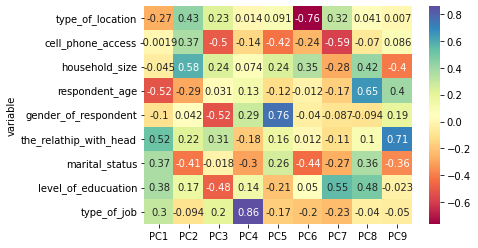

In [ ]:
#Get correlation matrix plot for loadings
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

As the number of PCs is equal to the number of original variables, We should keep only the PCs which explain the most variance (70-95%) to make the interpretation easier. The More the PCs you include that explains most variation in the original data, better will be the PCA model.
The eigenvalues (variance explained by each PC) for PCs can help to retain the number of PCs. Generally, PCs with eigenvalues > 1 contributes greater variance and should be retained for further analysis.

In [ ]:
#Get Eigen values
pca.explained_variance_

array([1.82577745, 1.60686269, 1.32572657, 0.9188789 , 0.88682531,
       0.7349788 , 0.65445055, 0.58733384, 0.45964574])

***Interpreting PCA***

The first 3 Principal components contribute to approximately 52 % of total variance and have eigen values > 1 hence we can retain them as part of our analysis.

The first 5 PC's contribute to 70 % of total variance and eigen values are closer to 1 but plotting them will be tedious.


In [ ]:
#Use 3 Principal components to train our algorithm
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

#From the output, with only three features, the random forest algorithm is able to correctly
#predict 4027 out of 4690 instances, resulting in 85.86% accuracy.

[[4027    0]
 [ 663    0]]
Accuracy 0.85863539445629


2.FACTOR ANALYSIS

In [ ]:
#Evaluate the factorability of our dataset.
#We use Kaiser-Meyer-Olkin Test

#Install factor analyzer
!pip install factor_analyzer==0.2.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# It determines the adequacy for each observed variable and for the complete model. 
# KMO estimates the proportion of variance among all the observed variable. 
# Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
# Value of KMO less than 0.6 is considered inadequate.
# 
from factor_analyzer.factor_analyzer import calculate_kmo
finance = finance_df.drop(['has_a_bank_account','country'],axis = 1)
kmo_all,kmo_model=calculate_kmo(finance)

print('The proportion of variance for each variable is: \n ',kmo_all)
print('The proportion of variance for the whole data is ',kmo_model)

#Value of KMO is  0.5812072030493886 which is considered inadequate.

The proportion of variance for each variable is: 
                               KMO
type_of_location        0.665317
cell_phone_access       0.554132
household_size          0.532091
respondent_age          0.618325
gender_of_respondent    0.495427
the_relathip_with_head  0.540117
marital_status          0.583877
level_of_educuation     0.595295
type_of_job             0.702373
The proportion of variance for the whole data is  0.5812072030493886


In [ ]:
#Using Bartlett's test of sphericity
#If the test found statistically insignificant, 
# we should not employ a factor analysis.

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(finance)
print('chi_square_value: ',chi_square_value)
print('p_value: ', p_value)

#In Bartlett ’s test, the p-value is 0. The test was statistically significant hence we can employ factor analysis

chi_square_value:  20800.70855296194
p_value:  0.0


In [ ]:
#Choosing number of factors
#Choose on basis of the amount of common variance factors explain
#Select no. of factors whose eigen values > 1
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(finance, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

#Here only 3 eigen_values are greater than 1.
#Hence we need to choose 3 factors

,Original_Eigenvalues
0,1.831930
1,1.605317
2,1.323156
3,0.914845
4,0.886590
5,0.733535
6,0.654828
7,0.587440
8,0.462359


In [ ]:
#Perform factor analysis for 3 factors
fa = FactorAnalyzer()
fa.analyze(finance, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
type_of_location,-0.069457,0.484896,-0.040412
cell_phone_access,-0.007628,0.179446,0.447802
household_size,0.197260,0.611957,0.025819
respondent_age,-0.561461,0.005110,-0.232830
gender_of_respondent,-0.135097,-0.008856,0.245076
the_relathip_with_head,0.860284,0.047960,-0.155178
marital_status,0.228654,-0.521263,-0.095961
level_of_educuation,0.293741,-0.162327,0.586659
type_of_job,0.216674,-0.140448,-0.058582


In [ ]:
#Get variance for each factor
fa.get_factor_variance()

#We note that approximately 32% of total variance is explained by the 3 factors

,Factor1,Factor2,Factor3
SS Loadings,1.302885,0.962011,0.697988
Proportion Var,0.144765,0.106890,0.077554
Cumulative Var,0.144765,0.251655,0.329209


3.LINEAR DISCRIMINANT ANALYSIS.

In [ ]:
#divides data into training and test sets
#
X = finance_df.drop(['has_a_bank_account','country'],axis = 1)
y = finance_df['has_a_bank_account']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [ ]:
# Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Performing LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components= 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#label contain only two classes, so the maximum number of components can only be 2-1 = 1.

In [ ]:
#Train and make predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Evaluate Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

#We can see that with one linear discriminant, the algorithm achieved an accuracy of 86.88%, 
# which is slightly greater than the accuracy achieved with three principal components, which was 85.86%.

[[5732  297]
 [ 626  380]]
Accuracy0.8687988628287135
